In [ ]:
# Dataset from kaggle
# https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

# Fake News Detection using NLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [2]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
true['label'] = 1
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [4]:
fake['label'] = 0
fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
# Concatenating the two dataframes, true and fake
df = pd.concat([true, fake])

In [6]:
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
# Checking to see if label column is balanced or not
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

**The dataset has almost balanced labels so we can move forward with fake news detection**

In [13]:
# Inspecting the dataframe further
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [8]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**Our dataframe has no null and NA values, no further need for cleaning the data**

In [10]:
# Finding out the different subjects of news
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

**politicsNews is used most frequently**

In [24]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


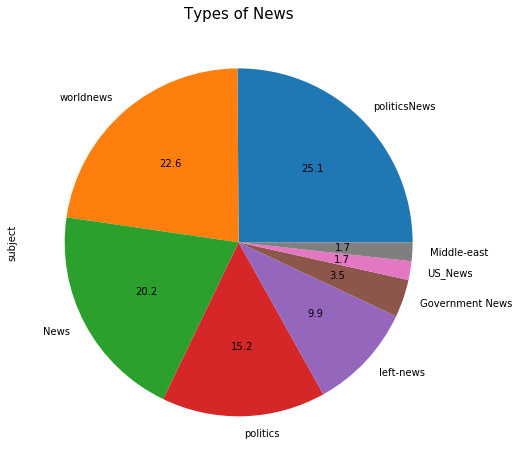

In [11]:
df['subject'].value_counts().plot(kind='pie', autopct='%.1f', figsize=(12,8))

plt.title('Types of News', fontsize=15);

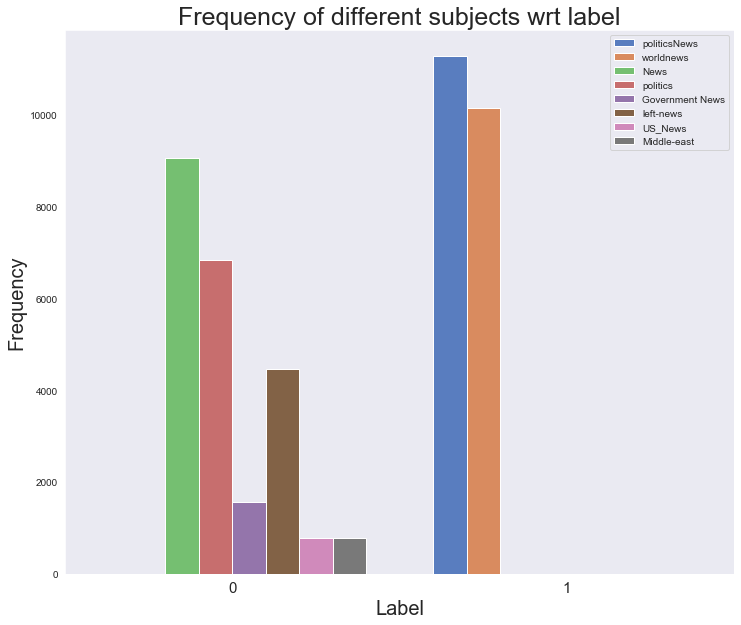

In [14]:
import seaborn as sns
plt.figure(figsize = (12,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = df , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, fontsize=15)
plt.xlabel('Label', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Frequency of different subjects wrt label', fontsize=25)
plt.legend(loc=1);

**From the above graph we can see that mostly True news belongs to only two types of news i.e *politicNews* and *worldnews***

**While fake news belongs to *News, politics, Government News, left-news, US_News, Middle-east***

Conclusively we can say that real news belongs to only **politicNews** and **worldnews**

In [15]:
# Merging the two title and text columns into a single column
df['text'] = df['title'] + " " + df['text']
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1


In [16]:
# Removing unnecessary columns from our analysis
df.drop(['title', 'subject'],axis=1, inplace=True)
df

,text,date,label
0,"As U.S. budget fight looms, Republicans flip t...","December 31, 2017",1
1,U.S. military to accept transgender recruits o...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,"December 29, 2017",1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,"January 14, 2016",0


## Wordcloud creation

Wordclouds are a good way to analyze repetitive characters and helps to see them visually.

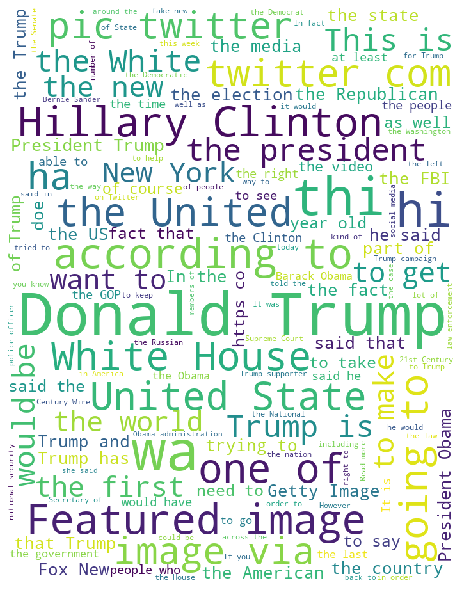

In [21]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 700, height = 900, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 0].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**This wordcloud shows there are a lot of fake news about Donald Trump, Hillary Clinton, Whitehouse**

## Training Model

In [23]:
X = df['text']
Y = df['label']

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

*We will now apply different machine learning models and then evaluate the performance of each to find the best one*

## Naive Bayes

Converting the textual data into number format for model training using CountVectorizer()

Accuracy:   93.9


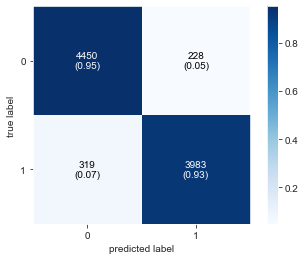

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model_name = ['Multinomial Naive Bayes', 'KNN', 'Decision Tree (GINI)', 'Decision Tree (Entropy)', 'PassiveAggressiveClassifier',
              'Logistic regression']

# initializing a list to hold accuracy of each model
accuracy_list = []

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100))

# Saving accuracy into a list
accuracy_list.append(score)

# Plotting graph
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## KNN Classifier

Accuracy:   88.5 %


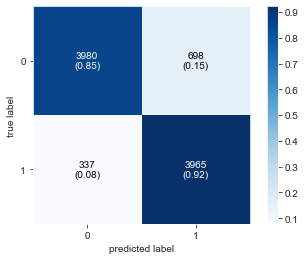

In [93]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("Accuracy:   %0.1f" % (score*100), '%')

# Saving accuracy into a list
accuracy_list.append(score)

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Decision Tree using GINI

accuracy:   99.5


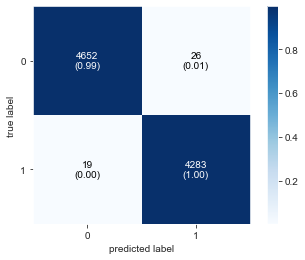

In [95]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion='gini'))
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.1f" % (score*100))

# Saving accuracy into a list
accuracy_list.append(score)

# For plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Decision Tree using Entropy

accuracy:   99.6


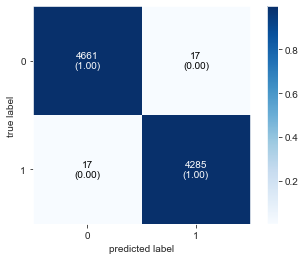

In [96]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.1f" % (score*100))

# Saving accuracy into a list
accuracy_list.append(score)

# For plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Passive Aggressive Classifier

accuracy:   99.7


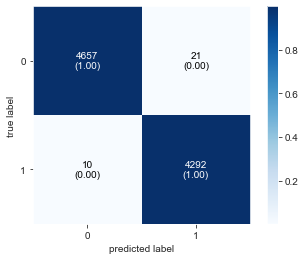

In [97]:
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.1f" % (score*100))

# Saving accuracy into a list
accuracy_list.append(score)

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])


# For plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Logistic Regression

accuracy:   98.9


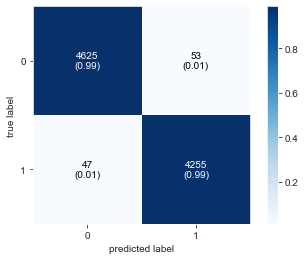

In [98]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  LogisticRegression())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.1f" % (score*100))

# Saving accuracy into a list
accuracy_list.append(score)

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])

# For plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [99]:
model_name = ['Multinomial Naive Bayes', 'KNN', 'Decision Tree (GINI)', 'Decision Tree (Entropy)', 'PassiveAggressiveClassifier',
              'Logistic regression']

In [100]:
data = {'model_name': model_name, 'Accuracy': accuracy_list}

model_df = pd.DataFrame(data)
model_df

,model_name,Accuracy
0,Multinomial Naive Bayes,0.939087
1,KNN,0.884744
2,Decision Tree (GINI),0.994989
3,Decision Tree (Entropy),0.996214
4,PassiveAggressiveClassifier,0.996548
5,Logistic regression,0.988864


In [102]:
# Converting accuracy into percentage form
model_df['Accuracy'] = model_df['Accuracy'] * 100
model_df

,model_name,Accuracy
0,Multinomial Naive Bayes,93.908686
1,KNN,88.474388
2,Decision Tree (GINI),99.498886
3,Decision Tree (Entropy),99.621381
4,PassiveAggressiveClassifier,99.654788
5,Logistic regression,98.886414


## Visualizing the results from our models


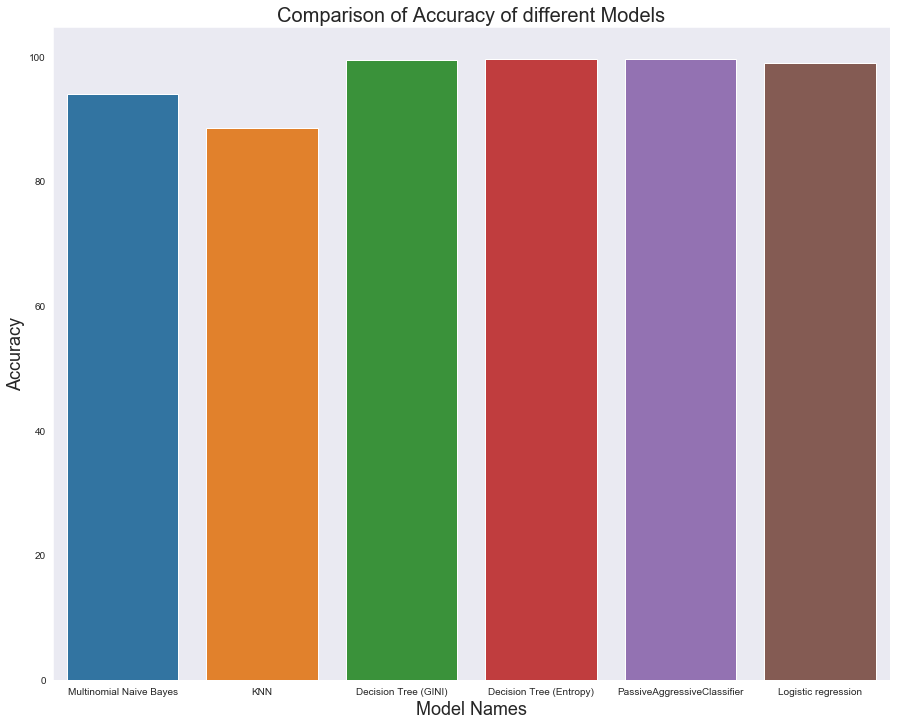

In [120]:
plt.figure(figsize=(15,12))
sns.barplot(x='model_name', y='Accuracy', 
            data=model_df)

plt.xlabel('Model Names', fontsize= 18)
plt.ylabel('Accuracy', fontsize= 18)
plt.title("Comparison of Accuracy of different Models", size=20);

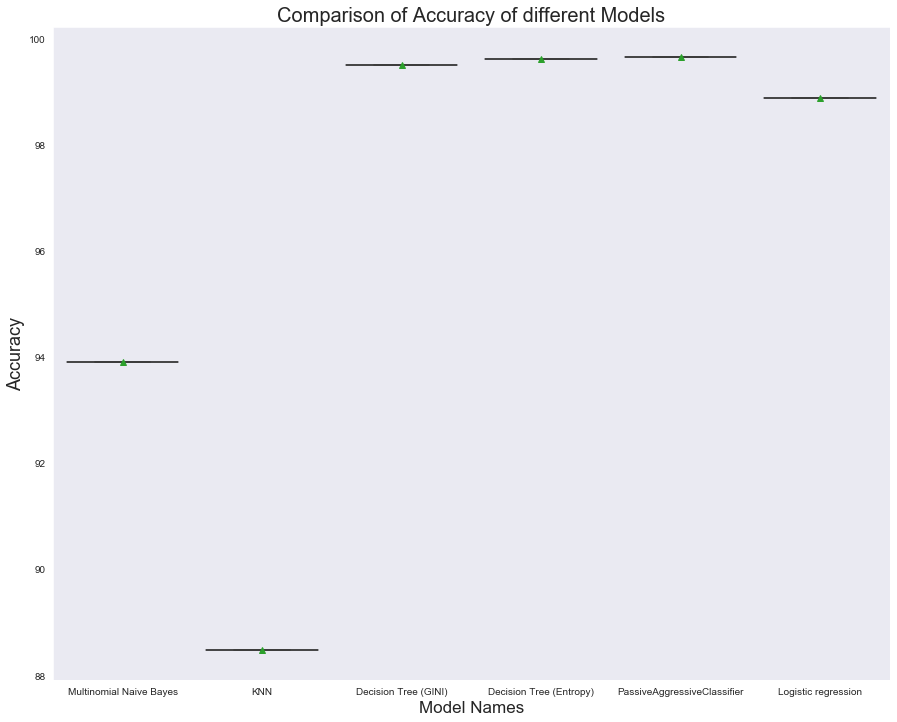

In [146]:
plt.figure(figsize=(15,12))
sns.boxplot(x='model_name', y='Accuracy', 
            data=model_df,  
            showmeans=True)

plt.xlabel('Model Names', fontsize= 17)
plt.ylabel('Accuracy', fontsize= 18)
plt.title("Comparison of Accuracy of different Models", size=20);

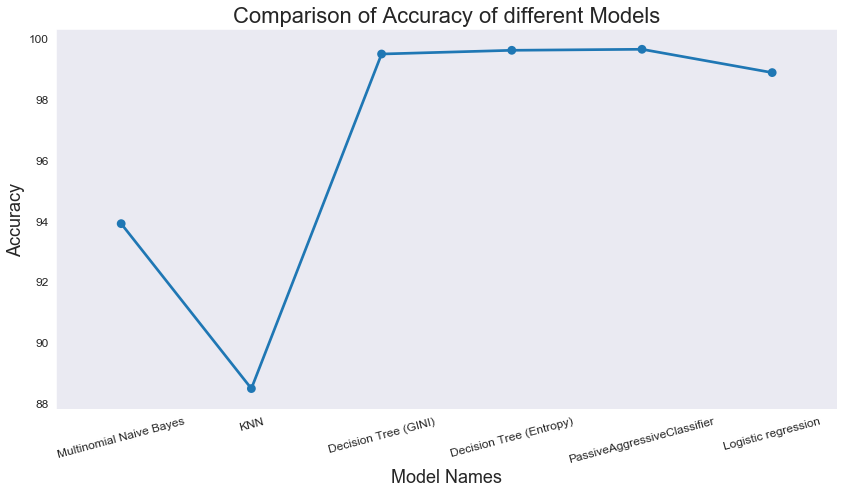

In [148]:
plt.figure(figsize=(14,7))
sns.pointplot(x='model_name', y='Accuracy', 
            data=model_df)

plt.xlabel('Model Names', fontsize= 18)
plt.ylabel('Accuracy', fontsize= 18)
plt.xticks(rotation=15, size=12)
plt.yticks(size=12)
plt.title("Comparison of Accuracy of different Models", size=22);

**This pointplot helps us to identify visually the small accuracy difference between PassiveAggressiveClassifier and DecisionTree.**

**Through this plot we can safely say that our PassiveAggresiveClassifier model had the highest accuracy**

In [153]:
# We can also confirm this through statistical techniques by applying on the dataframe
model_df['Accuracy'].max()

99.65478841870824

In [154]:
model_df.max()

model_name    PassiveAggressiveClassifier
Accuracy                        99.654788
dtype: object

Hence, we can confirm that our **PassiveAggressiveClassifier** model performs the best out of all the models and has the maximum accuracy of **99.65%**  

## Conclusion

Conclusively, we were able to successfully classify the Fake News Detection using various different machine learning algorithms and NLP techniques with an extremely high accuracy of **99.65%**.
We finally conclude that according to our classification the best model for Fake News detection is indeed the **PassiveAggressiveClassifer** with a very high accuracy because it builds up incrementally and belongs to the family of algorithms for large scale learning. 

Although this is just the tip of the iceberg, there are much better and more advanced techniques and algorithms for Fake News Detection.